In [1]:
%matplotlib inline
import yt
import yt.units as unit
import matplotlib.pyplot as plt
from yt.analysis_modules.halo_analysis.api import *
import corr2

/Users/Oleg/yt-x86_64/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-macosx-10.4-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
path='/Users/Oleg/Rockstar/'   ##Put here the directory where to find the file

In [4]:
ds1=yt.GadgetDataset(path+"snapshot_100")   ##Add name of file

yt : [INFO     ] 2017-04-04 23:08:32,704 Calculating time from 1.000e+00 to be 4.250e+17 seconds
yt : [INFO     ] 2017-04-04 23:08:32,706 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2017-04-04 23:08:32,729 Parameters: current_time              = 4.2498606916e+17 s
yt : [INFO     ] 2017-04-04 23:08:32,730 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-04-04 23:08:32,731 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-04-04 23:08:32,733 Parameters: domain_right_edge         = [ 50000.  50000.  50000.]
yt : [INFO     ] 2017-04-04 23:08:32,734 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-04-04 23:08:32,734 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-04-04 23:08:32,735 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2017-04-04 23:08:32,736 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2017-04-04 23:08:32,736 Parameters: hubble_constant           = 0.7


In [5]:
p1 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')

yt : [INFO     ] 2017-04-04 23:08:32,754 Allocating for 2.097e+06 particles (index particle type 'all')
yt : [INFO     ] 2017-04-04 23:08:33,146 Identified 1.469e+05 octs
yt : [INFO     ] 2017-04-04 23:08:33,693 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-04-04 23:08:33,694 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-04-04 23:08:33,697 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-04-04 23:08:33,698 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-04-04 23:08:33,701 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



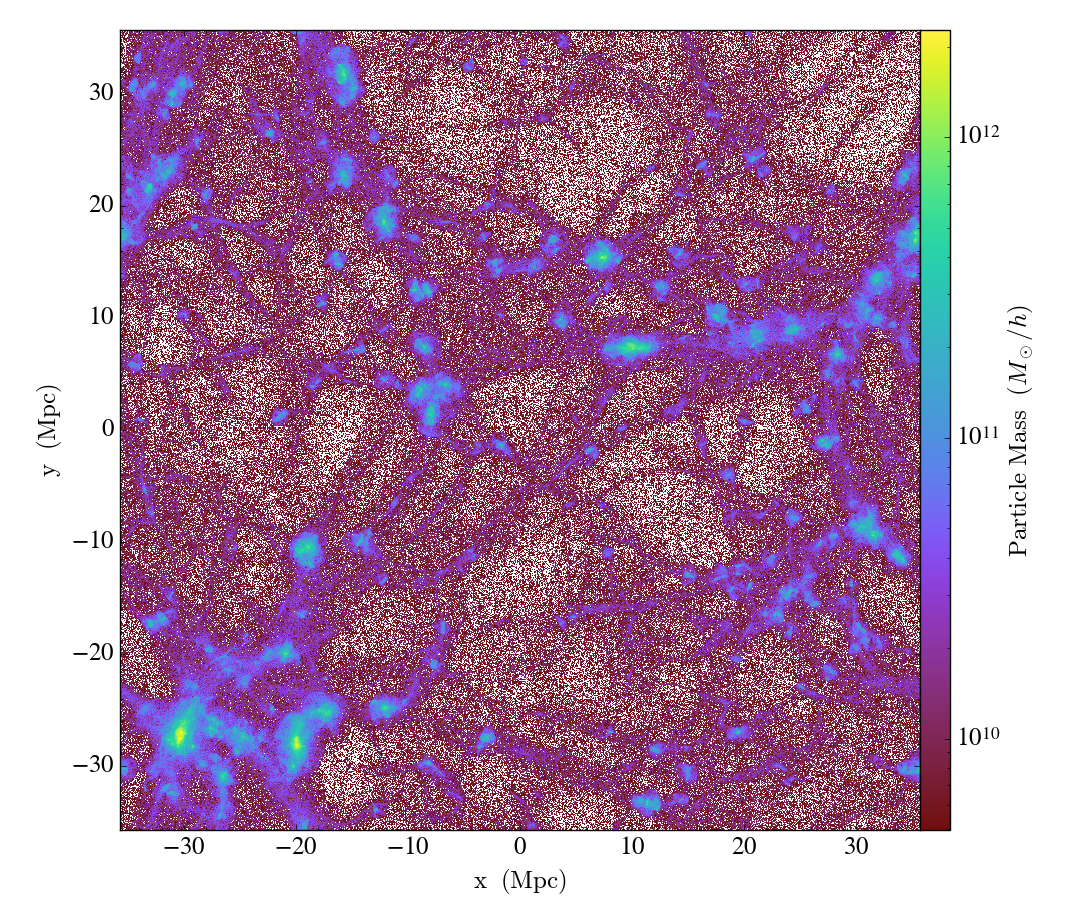

In [6]:
p1.set_axes_unit('Mpc')
p1.set_unit('particle_mass', 'Msun/h')


ad_data = ds1.all_data()

p_x = ad_data['particle_position_x'].in_units('Mpc/h')
p_y = ad_data['particle_position_y'].in_units('Mpc/h')
p_z = ad_data['particle_position_z'].in_units('Mpc/h')
pos = np.array([p_x, p_y, p_z]).T

box = 50.
n_bin = int(np.sqrt(len(p_x)))

hist = corr2.corr2(pos, int(box), n_bin, model=1)

In [7]:
halos  = yt.load(path+'halos_0.0.bin')

yt : [INFO     ] 2017-04-04 23:08:36,396 Parameters: current_time              = 4.24986071675e+17 s
yt : [INFO     ] 2017-04-04 23:08:36,396 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-04-04 23:08:36,398 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-04-04 23:08:36,399 Parameters: domain_right_edge         = [ 50.  50.  50.]
yt : [INFO     ] 2017-04-04 23:08:36,401 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-04-04 23:08:36,402 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-04-04 23:08:36,403 Parameters: omega_lambda              = 0.699999988079
yt : [INFO     ] 2017-04-04 23:08:36,403 Parameters: omega_matter              = 0.300000011921
yt : [INFO     ] 2017-04-04 23:08:36,404 Parameters: hubble_constant           = 0.699999988079


In [8]:
hc = HaloCatalog(halos_ds = halos)
hc.load()

yt : [INFO     ] 2017-04-04 23:08:36,413 Allocating for 3.102e+03 particles (index particle type 'all')
yt : [INFO     ] 2017-04-04 23:08:36,423 Identified 1.433e+03 octs


yt : [INFO     ] 2017-04-04 23:08:38,257 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-04-04 23:08:38,258 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-04-04 23:08:38,262 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-04-04 23:08:38,263 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-04-04 23:08:38,265 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



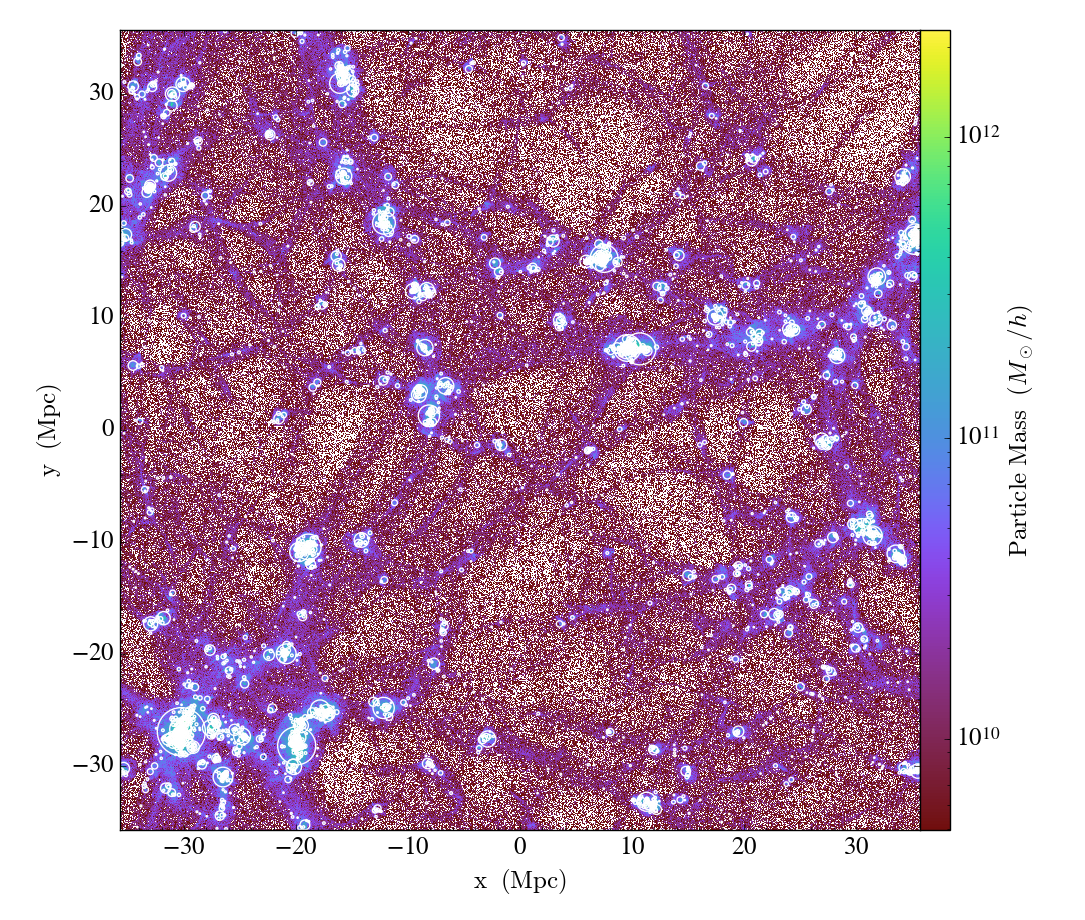

In [9]:
p2 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')
p2.annotate_halos(hc)
p2.set_axes_unit('Mpc')
p2.set_unit('particle_mass', 'Msun/h')


In [10]:
import tempfile
import shutil
import os

tmpdir = tempfile.mkdtemp()

In [11]:
hc2 = HaloCatalog(data_ds = ds1, halos_ds= halos, 
                  output_dir = os.path.join(tmpdir,'halo_catalog'))

In [12]:
hc2.add_filter("quantity_value","particle_mass",">",1e12,"Msun/h")

In [13]:
hc2.create()

yt : [INFO     ] 2017-04-04 23:08:43,911 Saving halo catalog (280 halos) to /var/folders/c8/vqw4f0692sq917vygxcr3gzc0000gn/T/tmptDGGWT/halo_catalog/halo_catalog.
yt : [INFO     ] 2017-04-04 23:08:43,913 Saving field data to yt dataset: /var/folders/c8/vqw4f0692sq917vygxcr3gzc0000gn/T/tmptDGGWT/halo_catalog/halo_catalog.0.h5.


In [14]:
halos_ds1 = yt.load(os.path.join(tmpdir,'halo_catalog/halo_catalog.0.h5'))

hc_r = HaloCatalog(halos_ds=halos_ds1, 
                  output_dir=os.path.join(tmpdir,'halo_catalog'))
hc_r.load()

yt : [INFO     ] 2017-04-04 23:08:43,956 Parameters: current_time              = 4.24986071675e+17
yt : [INFO     ] 2017-04-04 23:08:43,957 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-04-04 23:08:43,958 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-04-04 23:08:43,960 Parameters: domain_right_edge         = [  2.20405545e+26   2.20405545e+26   2.20405545e+26]
yt : [INFO     ] 2017-04-04 23:08:43,962 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-04-04 23:08:43,963 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-04-04 23:08:43,964 Parameters: omega_lambda              = 0.699999988079
yt : [INFO     ] 2017-04-04 23:08:43,965 Parameters: omega_matter              = 0.300000011921
yt : [INFO     ] 2017-04-04 23:08:43,966 Parameters: hubble_constant           = 0.699999988079
yt : [INFO     ] 2017-04-04 23:08:43,972 Allocating for 2.800e+02 particles (index particle type 'all')
yt : [INFO     ] 2017-0

yt : [INFO     ] 2017-04-04 23:08:44,366 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-04-04 23:08:44,367 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-04-04 23:08:44,369 xlim = 0.000000 50000.000000
yt : [INFO     ] 2017-04-04 23:08:44,370 ylim = 0.000000 50000.000000
yt : [INFO     ] 2017-04-04 23:08:44,373 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh



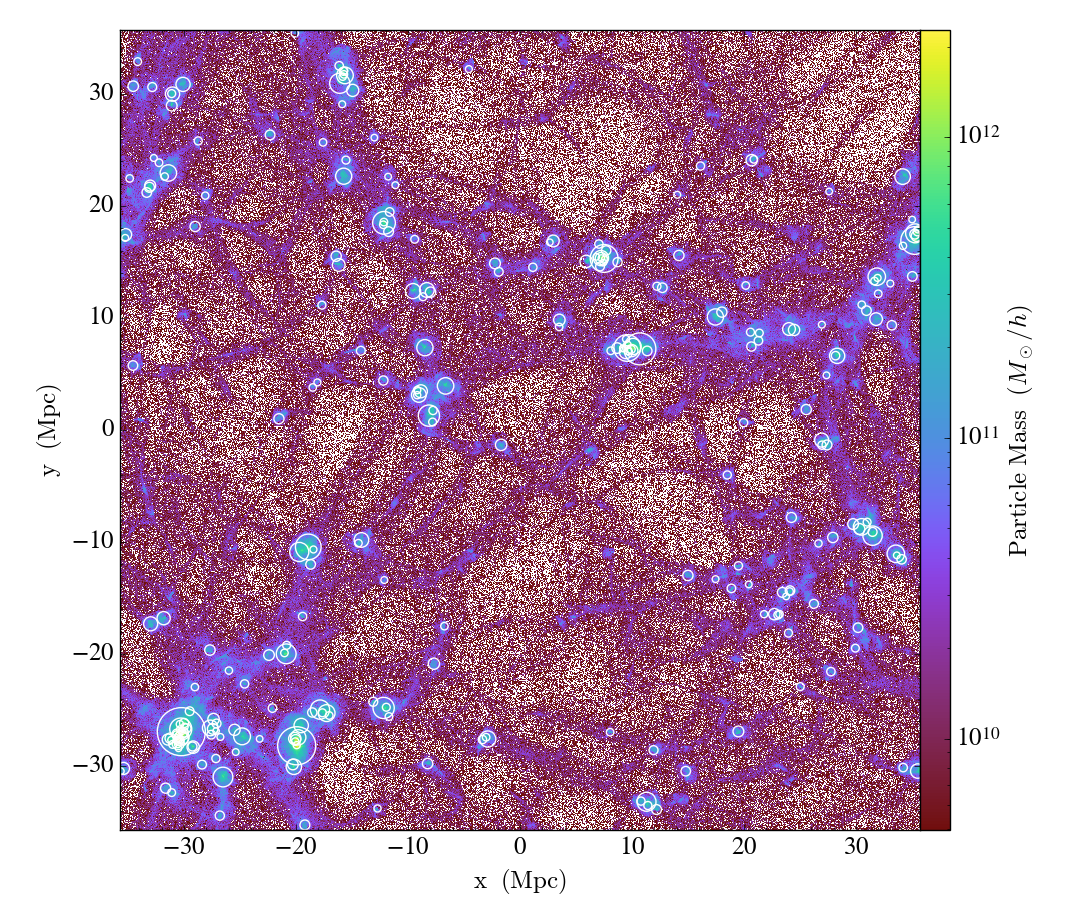

In [15]:
p3 = yt.ParticlePlot(ds1,'particle_position_x', 'particle_position_y', 'particle_mass')
p3.annotate_halos(hc_r)
p3.set_axes_unit('Mpc')
p3.set_unit('particle_mass', 'Msun/h')


In [16]:
ad_halos = halos.all_data()

14179944104.3 Msun


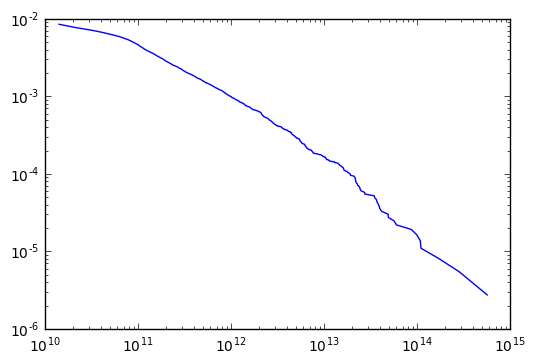

In [17]:
m_halos = np.sort(ad_halos["particle_mass"].in_units("Msun"))
print m_halos[0]
vol = (50.0/0.7)**3
n_density = np.arange(len(m_halos),0,-1)

m_halos, u_index = np.unique(m_halos, return_index=True)
n_density = n_density[u_index]/vol
#print n_density
plt.loglog(m_halos,n_density)

In [18]:
print min(m_halos) , max(m_halos)

14179944104.3 Msun 5.68169105733e+14 Msun


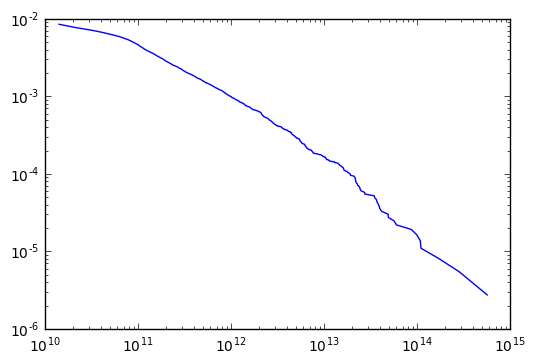

In [19]:
from yt.analysis_modules.halo_mass_function.api import *
hmf = HaloMassFcn(halos_ds=halos,omega_matter0=0.3,omega_lambda0=0.7,hubble0=0.7,log_mass_min=10.,log_mass_max=15., fitting_function=1)

#print hmf.n_cumulative_sim
plt.loglog(hmf.masses_sim, hmf.n_cumulative_sim)

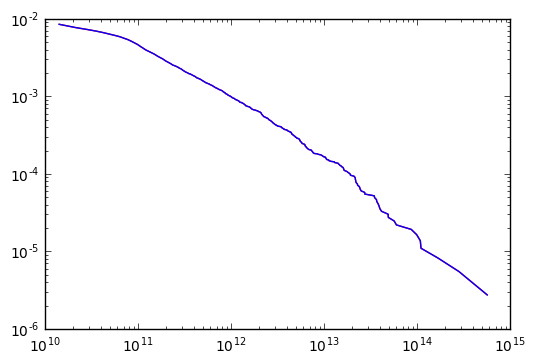

In [20]:
plt.figure()
plt.loglog(m_halos,n_density,'r')
plt.loglog(hmf.masses_sim, hmf.n_cumulative_sim)

In [21]:
print hmf.n_cumulative_sim.size

429


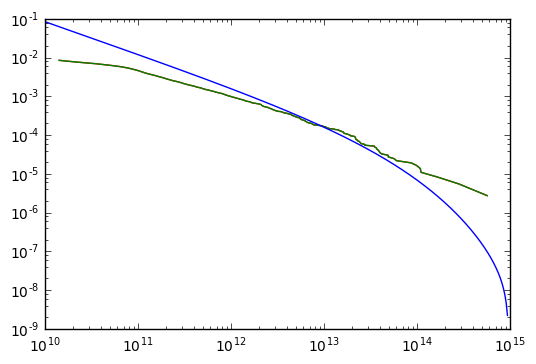

In [22]:
plt.figure()
m_halos = np.sort(ad_halos["particle_mass"].in_units("Msun"))
#print m_halos[0]
vol = (50./0.7)**3.
n_density = np.arange(len(m_halos),0,-1)
#print n_density
m_halos, u_index = np.unique(m_halos, return_index=True)
n_density = n_density[u_index]/vol
plt.loglog(m_halos,n_density,'r')
plt.loglog(hmf.masses_sim, hmf.n_cumulative_sim,'g')
plt.loglog(hmf.masses_analytic, hmf.n_cumulative_analytic)

In [23]:
pos_x = ad_halos["particle_position_x"].in_units("Mpc/h")
pos_y = ad_halos["particle_position_y"].in_units("Mpc/h")
pos_z = ad_halos["particle_position_z"].in_units("Mpc/h")

halos_p = np.array([pos_x, pos_y, pos_z]).T

In [24]:
box = 50
n_bin = int(np.sqrt(len(pos_x)))

In [25]:
hist_p = corr2.corr2(halos_p, box, n_bin, model = 1)

In [26]:
pos_d = corr2.binning(box, n_bin)

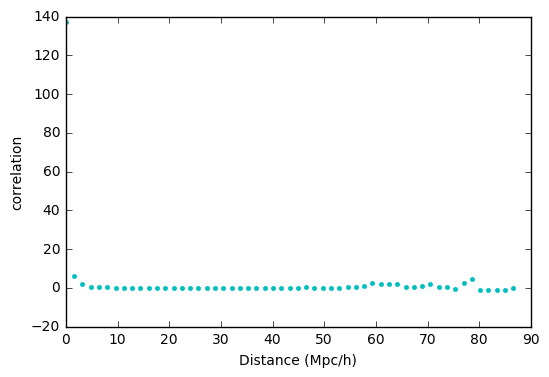

In [27]:
plt.plot(pos_d, hist_p,'.c');
plt.xlabel('Distance (Mpc/h)')
plt.ylabel('correlation')

In [28]:
hist_p2 = corr2.corr2(halos_p, box, n_bin, model = 0)

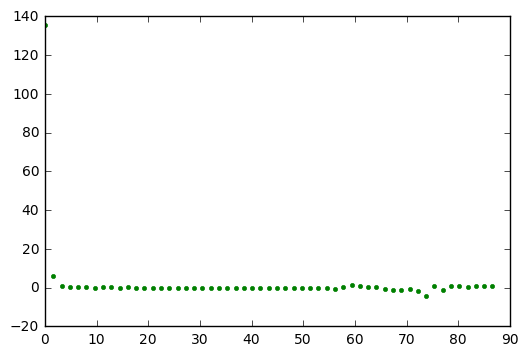

In [29]:
plt.plot(pos_d, hist_p2,'.g');